## 1. **Data Preprocessing**

### Install preprocessor and num2words packages

In [1]:
%pip install matplotlib seaborn scikit-learn preprocessor

import preprocessor as p

import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
print("Importing libraries done")

Note: you may need to restart the kernel to use updated packages.
Importing libraries done


In [ ]:
%pip install num2words

In [2]:
from num2words import num2words

print(num2words(2025))                 # 'two thousand and twenty-five'
print(num2words(42, to='ordinal'))     # 'forty-second'
print(num2words(100, lang='de'))       # 'einhundert'


two thousand and twenty-five
forty-second
einhundert


In [4]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [5]:
 
%pip uninstall pandas scikit-learn seaborn numpy matplotlib preprocessor num2words langdetect nltk textblob unidecode wordcloud gensim spacy scipy -y

# Reinstall the packages, allowing pip to find compatible versions
# It's generally best to let pip handle dependency resolution unless a specific version is absolutely necessary.
%pip install pandas scikit-learn seaborn matplotlib preprocessor num2words langdetect nltk textblob unidecode wordcloud gensim spacy scipy

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: matplotlib 3.10.3
Uninstalling matplotlib-3.10.3:
  Successfully uninstalled matplotlib-3.10.3
Found existing installation: preprocessor 1.1.3
Uninstalling preprocessor-1.1.3:
  Successfully uninstalled preprocessor-1.1.3
Found existing installation: num2words 0.5.14
Uninstalling num2words-0.5.14:
  Successfully uninstalled num2words-0.5.14
Found existing installation: langdetect 1.0.9
Uninstalling langdetect-1.0.9:
  Successfully uninstalled langdetect-1.0.9
Found existing installation: nltk 3.9.1
Uninsta

You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached preprocessor-1.1.3-py3-none-any.whl
  Using cached num2words-0.5.14-py3-none-any.whl.metadata (13 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached Unidecode-1.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached spacy-3.8.6-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60

### Import Packages and Load Dataset

In [6]:
import pandas as pd
import re
import numpy as np
import preprocessor as p
from num2words import num2words

In [7]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
from textblob import Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
import pandas as pd

# Use relative or absolute path to your CSV file
df = pd.read_csv('WELFake_Dataset.csv')  # if it's in the same folder




In [15]:
import pandas as pd
print(pd.__version__)


2.2.3


In [16]:
df = df[['title', 'text', 'label']]
df.head(5)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


As the table above displays, our dataset has only 3 columns: title, text, and label. The title and text were extracted from articles. For label, 1 means real and 0 means fake news.

###Drop Null Values

In [17]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

Since we have nearly 600 null values out of more than 70000 insatnces, we decided to drop all the rows contain null. <br>
Additionally, since some of the rows contained a blank space, we first converted the blank space to a null value to be dropped as well. 

In [19]:
def blank_to_nan(df_w_column):
    temp = []
    for item in df_w_column:
        if item == '':
            temp.append(np.nan)
        else:
            temp.append(item)
    return temp

In [20]:
title = blank_to_nan(df['title'])
text = blank_to_nan(df['text'])

In [21]:
a = pd.DataFrame({'title':title, 'text':text, 'label':df['label']})

In [22]:
df = a.dropna()

### Data Preprocessing

#### Remove Symbols

Firstly, we defined the function ```remove_symbols``` to remove all unnecessary characters.

* In the ```remove_symbols``` function, we transform all title and text into lower case. 
* The function also removes punctuation since they does not give any extra information. 
* Another thing our ```remove_symbols``` function handles is the stop words (or commonly occurring words). ```stopwords``` are English words that don't add much to a sentence's meaning. Therefore, they can be safely ignored without affecting the sentence's meaning.

In [20]:
%pip install language-detector
%pip install Unidecode

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for language-detector: filename=language_detector-5.0.2-py3-none-any.whl size=7059 sha256=1a4d8b8d6f2e29e4a81f8d23c1c20f76032dd60398e042ee7fe363c20e2747d4
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\15\44\e3\f01a287f85272a40aa914b7b4b7b1e49e59da00ba6042a26f3
Successfully built language-detector
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'language-detector' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'language-detector'. Discussion can be found at https://github.com/pypa/pip/issues/6334


Note: you may need to restart the kernel to use updated packages.


In [21]:
from nltk.corpus import stopwords
from language_detector import detect_language

import string 
import unidecode
stop = stopwords.words('english')
stop.append('io')

def clean_up(text):
    square_brackets = re.sub('\[[^]]*\]', '', text)
    no_url = re.sub(r'http\S+', '', square_brackets)
    no_punctuation = re.sub(r'[^\w\s]', ' ', no_url)
    no_pictures = re.sub('pic.+', '', no_punctuation)
    no_characters = re.sub('[а-яА-Я][\u4e00-\u9fff]', '', no_pictures)
    the_unicode = unidecode.unidecode(no_characters)
    stripped_white_space = the_unicode.strip()
    return stripped_white_space

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    cleaned_text = clean_up(text)
    no_stopwords = remove_stopwords(cleaned_text)
    return no_stopwords.lower()

# Apply function on review column
df['text'] = df['text'].apply(denoise_text)
df['title'] = df['title'].apply(denoise_text)

<>:10: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\['
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\1504850446.py:10: SyntaxWarning: invalid escape sequence '\['
  square_brackets = re.sub('\[[^]]*\]', '', text)
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\1504850446.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(denoise_text)
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\1504850446.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [23]:
# Removing all rows with these words, since the rows with these words are different languages
# Fill NaN values in 'text' column with empty string before applying str.contains
df = df[~df['text'].fillna('').str.contains('que')]
df = df[~df['text'].fillna('').str.contains('kontroliruemyi')]
df = df[~df['text'].fillna('').str.contains('obshchestvom')]

In [24]:
# Removing any blank rows created from the previous step 
df['title'] = blank_to_nan(df['title'])
df['text'] = blank_to_nan(df['text'])

In [24]:
# Dropping any new na values
new_df = df.dropna()

df['title'] = blank_to_nan(df['title'])
df['text'] = blank_to_nan(df['text'])

In [25]:
new_df.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf911 f...,1
2,unbelievable obama attorney general says charl...,demonstrators gathered last night exercising c...,1
4,satan 2 russia unvelis image terrifying new su...,rs 28 sarmat missile dubbed satan 2 replace ss...,1
5,time christian group sues amazon splc designat...,say one time someone sued southern poverty law...,1
6,dr ben carson targeted irs never audit spoke n...,dr ben carson tells story happened spoke obama,1


#### Lemmatization

Next, we will use stemming to turn the term into its root word rather by their removing suffices (stemming method). To find the root word, it uses the lexicon and does a morphological analysis.

In [26]:
# Update title and text columns with the lemmatized versions of the original title and text columns
new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\3870072181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\3870072181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [27]:
new_df.head()

,title,text,label
0,law enforcement high alert following threat co...,comment expected barack obama member fyf911 fu...,1
2,unbelievable obama attorney general say charlo...,demonstrator gathered last night exercising co...,1
4,satan 2 russia unvelis image terrifying new su...,r 28 sarmat missile dubbed satan 2 replace s 1...,1
5,time christian group sue amazon splc designati...,say one time someone sued southern poverty law...,1
6,dr ben carson targeted irs never audit spoke n...,dr ben carson tell story happened spoke obama,1


#### Tokenize String

Beside cleaning the text in our dataset, we also add two more columns to store the title and text after tokenlization.  

In [28]:
import textblob.download_corpora
textblob.download_corpora.download_all()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [30]:
# Update title and text columns with the lemmatized versions of the original title and text columns

new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Tokenize String
def tokenize(the_list):
    token_list = []
    for item in the_list:
        token_list.append(TextBlob(item).words)
    return token_list

new_df['title_token'] = tokenize([str(x) for x in new_df['title']])
new_df['text_token'] = tokenize([str(x) for x in new_df['text']])

C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\395095205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title'] = new_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\395095205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\395095205.py:13: SettingWithCo

In [31]:
new_df[['label', 'title_token', 'text_token']].head()

,label,title_token,text_token
0,1,"[law, enforcement, high, alert, following, thr...","[comment, expected, barack, obama, member, fyf..."
2,1,"[unbelievable, obama, attorney, general, say, ...","[demonstrator, gathered, last, night, exercisi..."
4,1,"[satan, 2, russia, unvelis, image, terrifying,...","[r, 28, sarmat, missile, dubbed, satan, 2, rep..."
5,1,"[time, christian, group, sue, amazon, splc, de...","[say, one, time, someone, sued, southern, pove..."
6,1,"[dr, ben, carson, targeted, irs, never, audit,...","[dr, ben, carson, tell, story, happened, spoke..."


#### Sentiment Analysis

In [36]:
# Function to return polarity
def polarity(the_list):
    pol_list = []
    for item in the_list:
        pol_list.append(TextBlob(item).sentiment[0])
    return pol_list

In [37]:
# Function to return subjectivity
def subjectivity(the_list):
    sub_list = []
    for item in the_list:
        sub_list.append(TextBlob(item).sentiment[1])
    return sub_list

In [38]:
# Create columns of polarity and subjectivity for both title and text
new_df['title_polarity'] = polarity([str(x) for x in new_df['title']])
new_df['title_subjectivity'] = subjectivity([str(x) for x in new_df['title']])
new_df['text_polarity'] = polarity([str(x) for x in new_df['text']])
new_df['text_subjectivity'] = subjectivity([str(x) for x in new_df['text']])

C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\206595182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_polarity'] = polarity([str(x) for x in new_df['title']])
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\206595182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_subjectivity'] = subjectivity([str(x) for x in new_df['title']])
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\206595182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [39]:
new_df[['label', 'title_polarity', 'title_subjectivity', 'text_polarity', 'text_subjectivity']].head(5)

,label,title_polarity,title_subjectivity,text_polarity,text_subjectivity
0,1,0.053333,0.213333,0.013333,0.30750
2,1,0.016667,0.666667,0.178571,0.36746
4,1,-0.287879,0.484848,0.100000,0.80500
5,1,-0.400000,0.450000,-0.094931,0.38894
6,1,0.000000,0.000000,0.000000,0.00000


#### Basic Features Extraction

In [40]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [ ]:
new_df['word_count_title'] = new_df['title'].apply(lambda x: len(str(x).split(" ")))
new_df['char_count_title'] = new_df['title'].str.len() # this also includes spaces
new_df['avg_word_title'] = new_df['title'].apply(lambda x: avg_word(x) if len(x) != 0 else 0)
new_df['numerics_title'] = new_df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

new_df['word_count_text'] = new_df['text'].apply(lambda x: len(str(x).split(" ")))
new_df['char_count_text'] = new_df['text'].str.len() 
new_df['avg_word_text'] = new_df['text'].apply(lambda x: avg_word(x) if len(x) != 0 else 0)
new_df['numerics_text'] = new_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\3523775176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word_count_title'] = new_df['title'].apply(lambda x: len(str(x).split(" ")))
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\3523775176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['char_count_title'] = new_df['title'].str.len() # this also includes spaces
C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\3523775176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [42]:
new_df.head(5)

,title,text,label,title_token,text_token,title_polarity,title_subjectivity,text_polarity,text_subjectivity,word_count_title,char_count_title,avg_word_title,numerics_title,word_count_text,char_count_text,avg_word_text,numerics_text
0,law enforcement high alert following threat co...,comment expected barack obama member fyf911 fu...,1,"[law, enforcement, high, alert, following, thr...","[comment, expected, barack, obama, member, fyf...",0.053333,0.213333,0.013333,0.30750,13,94,6.307692,1,261,1595,5.114943,6
2,unbelievable obama attorney general say charlo...,demonstrator gathered last night exercising co...,1,"[unbelievable, obama, attorney, general, say, ...","[demonstrator, gathered, last, night, exercisi...",0.016667,0.666667,0.178571,0.36746,13,101,6.846154,0,21,159,6.619048,0
4,satan 2 russia unvelis image terrifying new su...,r 28 sarmat missile dubbed satan 2 replace s 1...,1,"[satan, 2, russia, unvelis, image, terrifying,...","[r, 28, sarmat, missile, dubbed, satan, 2, rep...",-0.287879,0.484848,0.100000,0.80500,12,79,5.666667,1,55,324,4.909091,12
5,time christian group sue amazon splc designati...,say one time someone sued southern poverty law...,1,"[time, christian, group, sue, amazon, splc, de...","[say, one, time, someone, sued, southern, pove...",-0.400000,0.450000,-0.094931,0.38894,9,59,5.666667,0,144,1074,6.465278,0
6,dr ben carson targeted irs never audit spoke n...,dr ben carson tell story happened spoke obama,1,"[dr, ben, carson, targeted, irs, never, audit,...","[dr, ben, carson, tell, story, happened, spoke...",0.000000,0.000000,0.000000,0.00000,11,70,5.454545,0,8,45,4.750000,0


#### Term Frequency – Inverse Document Frequency (TF-IDF)

evaluer  l importance d un un document

In [43]:
import math

In [44]:
real_df = new_df[new_df['label']==1]
fake_df = new_df[new_df['label']==0]

In [45]:
real_title_norm_t = real_df[['title']].T
real_text_norm_t = real_df[['text']].T
fake_title_norm_t = fake_df[['title']].T
fake_text_norm_t = fake_df[['text']].T

In [46]:
def the_words(transposed_df):
    the_list = []
    # Use items() instead of iteritems() to iterate through columns
    for (columnName, columnData) in transposed_df.items():
        temp = []
        for x in columnData:
            # Ensure x is treated as a string before splitting
            for i in str(x).split():
                temp.append(i)
            the_list.append(temp)
    return the_list

def the_dict(words):
    x = 1
    the_dictionary = {}
    for item in words:
        temp = {}
        for i in item:
            if i in temp:
                temp[i] = temp[i] + 1
            else:
                temp[i] = 1
        the_dictionary[x] = temp
        x += 1
    return the_dictionary

real_title_words = the_words(real_title_norm_t)
real_text_words = the_words(real_text_norm_t)
fake_title_words = the_words(fake_title_norm_t)
fake_text_words = the_words(fake_text_norm_t)

real_title_tf_dict = the_dict(real_title_words)
real_text_tf_dict = the_dict(real_text_words)
fake_title_tf_dict = the_dict(fake_title_words)
fake_text_tf_dict = the_dict(fake_text_words)

In [47]:
real_title_len_word = real_df['word_count_title'].tolist()
real_text_len_word = real_df['word_count_text'].tolist()
fake_title_len_word = fake_df['word_count_title'].tolist()
fake_text_len_word = fake_df['word_count_text'].tolist()

In [48]:
def tfidf_functions(the_dictionary, length_of_words):
    x = 0
    list_of_words = []
    tf = []
    idf = []
    tfidf = []
    for i in the_dictionary:
        for j in the_dictionary[i].keys():
            tf_instance = (the_dictionary[i][j]/length_of_words[i-1])
            idf_instance = math.log(((1 + length_of_words[i-1])/(1 + tf_instance))+1)
            tfidf_instance = tf_instance * idf_instance
            tf.append(tf_instance)
            idf.append(idf_instance)
            tfidf.append(tfidf_instance)
            x += 1
            list_of_words.append(j)
    return list_of_words, tf, idf, tfidf

In [49]:
real_text_the_words, real_text_tf, real_text_idf, real_text_tfidf = tfidf_functions(real_text_tf_dict, real_text_len_word)
real_title_the_words, real_title_tf, real_title_idf, real_title_tfidf = tfidf_functions(real_title_tf_dict, real_title_len_word)

fake_text_the_words, fake_text_tf, fake_text_idf, fake_text_tfidf = tfidf_functions(fake_text_tf_dict, fake_text_len_word)
fake_title_the_words, fake_title_tf, fake_title_idf, fake_title_tfidf = tfidf_functions(fake_title_tf_dict, fake_title_len_word)

In [50]:
real_title_df = pd.DataFrame({'word':real_title_the_words, 'tf':real_title_tf, 'idf':real_title_idf, 'tfidf':real_title_tfidf})
real_text_df = pd.DataFrame({'word':real_text_the_words, 'tf':real_text_tf, 'idf':real_text_idf, 'tfidf':real_text_tfidf})

fake_title_df = pd.DataFrame({'word':fake_title_the_words, 'tf':fake_title_tf, 'idf':fake_title_idf, 'tfidf':fake_title_tfidf})
fake_text_df = pd.DataFrame({'word':fake_text_the_words, 'tf':fake_text_tf, 'idf':fake_text_idf, 'tfidf':fake_text_tfidf})

In [51]:
real_tfidf_title_df = real_title_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)
real_tfidf_text_df = real_text_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)

fake_tfidf_title_df = fake_title_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)
fake_tfidf_text_df = fake_text_df[['word', 'tfidf']].sort_values(by = 'tfidf', ascending = False)

In [52]:
real_tfidf_title_df.drop_duplicates(subset=['word'],keep='first',inplace=True)
real_tfidf_text_df.drop_duplicates(subset=['word'],keep='first',inplace=True)

fake_tfidf_title_df.drop_duplicates(subset=['word'],keep='first',inplace=True)
fake_tfidf_text_df.drop_duplicates(subset=['word'],keep='first',inplace=True)

In [53]:
real_tfidf_title_df

,word,tfidf
37825,dollar,1.099106
172732,vote,1.098612
163655,print,0.934887
232004,day,0.815850
71365,conspiracy,0.815850
...,...,...
151021,hsbc,0.089552
151007,dov,0.089552
151010,perversion,0.089552
151014,birkenfeld,0.089552


In [54]:
real_tfidf_text_df

,word,tfidf
1529258,county,1.865523
573490,l,1.275005
573489,case,1.238759
2531621,0,1.097267
402370,1,1.047971
...,...,...
813716,baluchi,0.002700
814133,reflagged,0.002700
814128,rpg,0.002700
814131,silkworm,0.002700


In [55]:
fake_tfidf_title_df

,word,tfidf
158364,really,0.919902
186068,win,0.808744
101298,life,0.757855
159967,politics,0.757855
8863,feed,0.733169
...,...,...
153606,insane,0.170022
90843,definition,0.170022
90835,lynn,0.170022
90839,ang,0.170022


In [56]:
fake_tfidf_text_df

,word,tfidf
2862902,nov,0.816472
2503829,advertisement,0.693147
1438409,reader,0.693147
314651,olym,0.693147
1289534,hot,0.693147
...,...,...
2251329,zelikow,0.003445
2251321,tobey,0.003445
2251319,silverberg,0.003445
2251313,rostow,0.003445


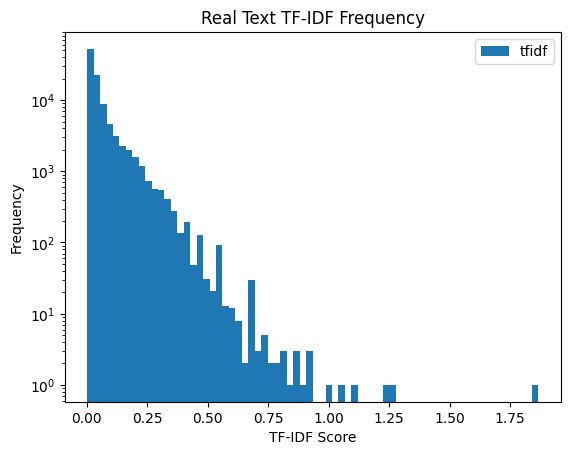

In [57]:
plot = real_tfidf_text_df.plot.hist(bins = 70, title = 'Real Text TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

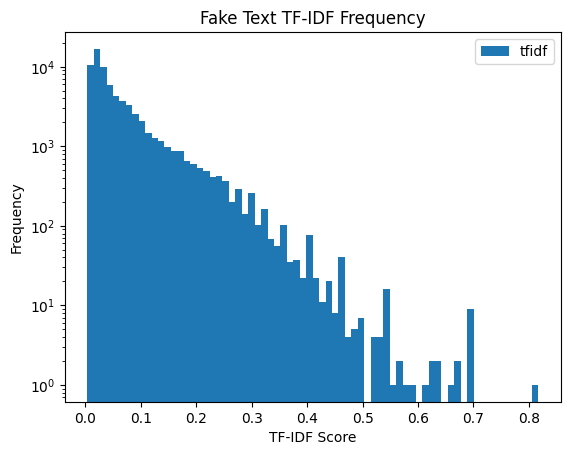

In [58]:
plot = fake_tfidf_text_df.plot.hist(bins = 70, title = 'Fake Text TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

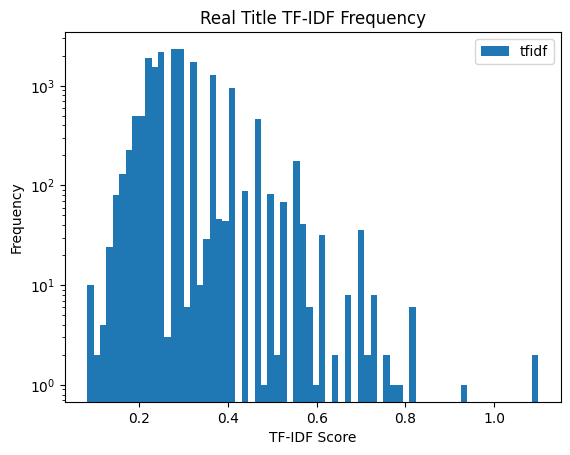

In [59]:
plot = real_tfidf_title_df.plot.hist(bins = 70, title = 'Real Title TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

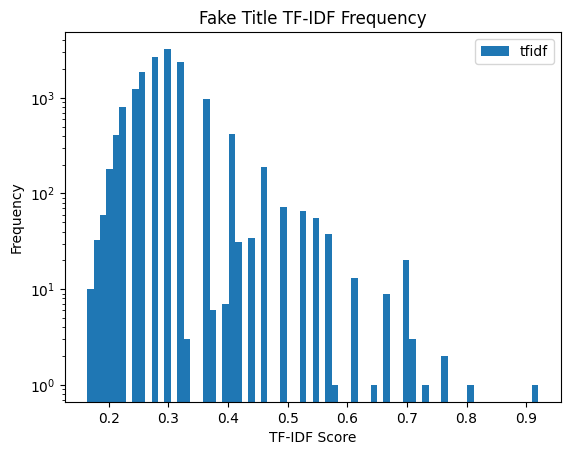

In [60]:
plot = fake_tfidf_title_df.plot.hist(bins = 70, title = 'Fake Title TF-IDF Frequency')
plot.set_xlabel('TF-IDF Score')
plot.set_ylabel('Frequency')
plot.set_yscale('log');

#### Data Dictionary and Discuss Data Formatting

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48390 entries, 0 to 72131
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               48390 non-null  object 
 1   text                48390 non-null  object 
 2   label               48390 non-null  int64  
 3   title_token         48390 non-null  object 
 4   text_token          48390 non-null  object 
 5   title_polarity      48390 non-null  float64
 6   title_subjectivity  48390 non-null  float64
 7   text_polarity       48390 non-null  float64
 8   text_subjectivity   48390 non-null  float64
 9   word_count_title    48390 non-null  int64  
 10  char_count_title    48390 non-null  int64  
 11  avg_word_title      48390 non-null  float64
 12  numerics_title      48390 non-null  int64  
 13  word_count_text     48390 non-null  int64  
 14  char_count_text     48390 non-null  int64  
 15  avg_word_text       48390 non-null  float64
 16  numerics_

## 2. **Exploratory Data Analysis** EDA

### Data Summary

C:\Users\MSI\AppData\Local\Temp\ipykernel_23028\2926090306.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['fake', 'real'])


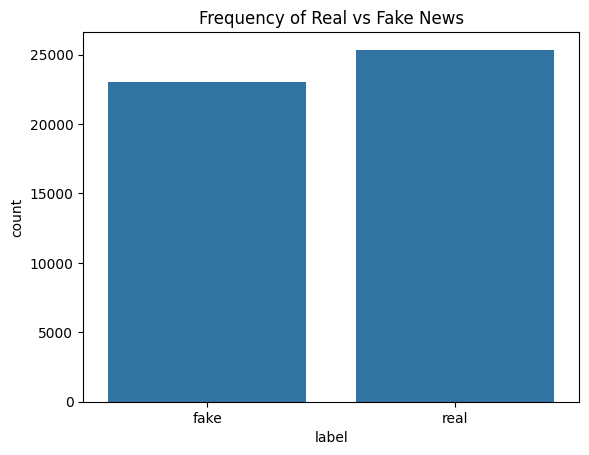

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.countplot(x = new_df['label'])
a.set_xticklabels(['fake', 'real'])
a.set_title('Frequency of Real vs Fake News');

In [63]:
length = len(new_df)
percent_real = len(new_df[new_df['label']==1])/length*100
percent_fake = len(new_df[new_df['label']==0])/length*100
print(f'There are {length} articles. \n{percent_real:.2f}% are real articles and {percent_fake:.2f}% are fake articles.')

There are 48390 articles. 
52.40% are real articles and 47.60% are fake articles.


### Number of Words/Characters/Numerics

In [64]:
real_df = new_df[new_df['label']==1]
fake_df = new_df[new_df['label']==0]

Frequency of words/characters (especially in title) has larger difference, and thus could have predictive properties

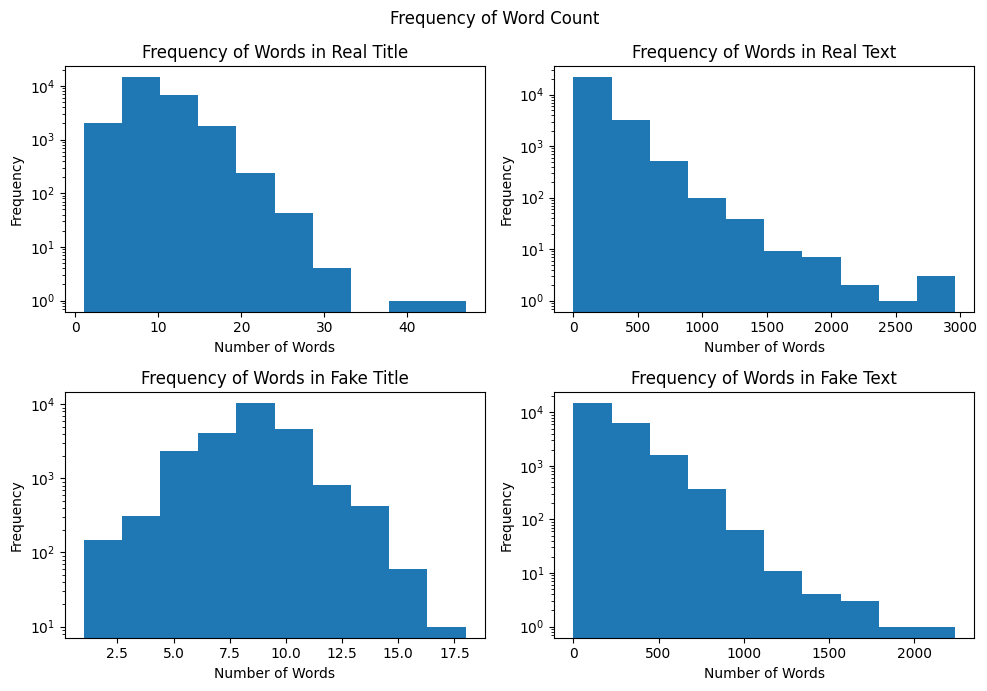

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Word Count')

ax1.hist(real_df['word_count_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Words in Real Title')

ax2.hist(real_df['word_count_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Words in Real Text')

ax3.hist(fake_df['word_count_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Number of Words')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Words in Fake Title')

ax4.hist(fake_df['word_count_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Number of Words')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Words in Fake Text')
plt.tight_layout()

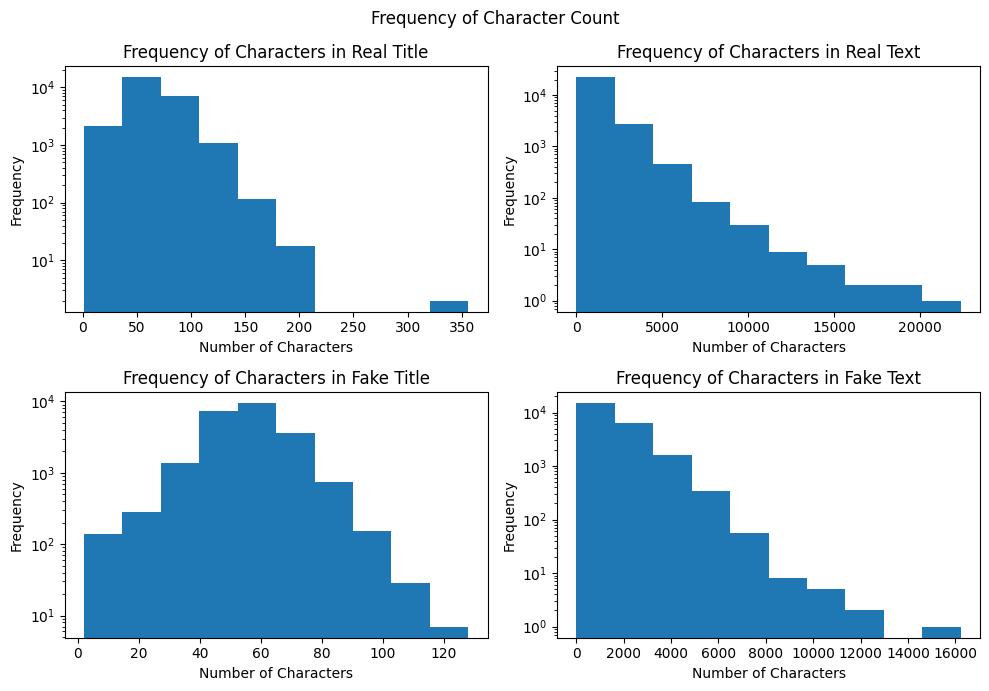

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Character Count')

ax1.hist(real_df['char_count_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Characters in Real Title')

ax2.hist(real_df['char_count_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Characters in Real Text')

ax3.hist(fake_df['char_count_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Number of Characters')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Characters in Fake Title')

ax4.hist(fake_df['char_count_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Number of Characters')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Characters in Fake Text')
plt.tight_layout()

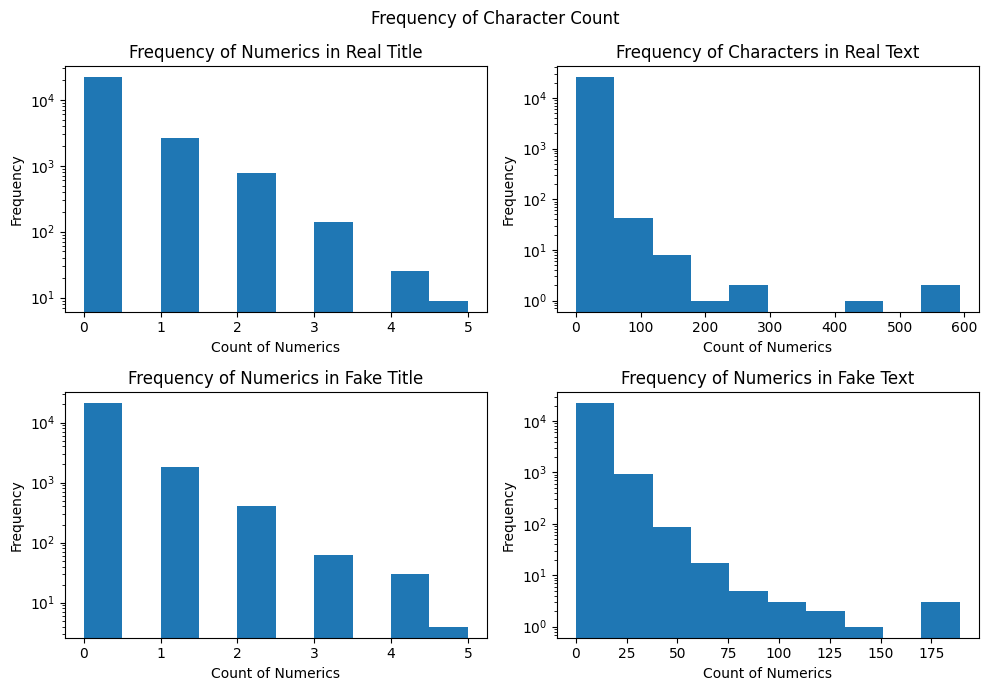

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,7))

plt.suptitle('Frequency of Character Count')

ax1.hist(real_df['numerics_title'])
ax1.set_yscale('log')
ax1.set_xlabel('Count of Numerics')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Numerics in Real Title')

ax2.hist(real_df['numerics_text'])
ax2.set_yscale('log')
ax2.set_xlabel('Count of Numerics')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Characters in Real Text')

ax3.hist(fake_df['numerics_title'])
ax3.set_yscale('log')
ax3.set_xlabel('Count of Numerics')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Numerics in Fake Title')

ax4.hist(fake_df['numerics_text'])
ax4.set_yscale('log')
ax4.set_xlabel('Count of Numerics')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Numerics in Fake Text')
plt.tight_layout()

### Wordcloud

#### Real Text

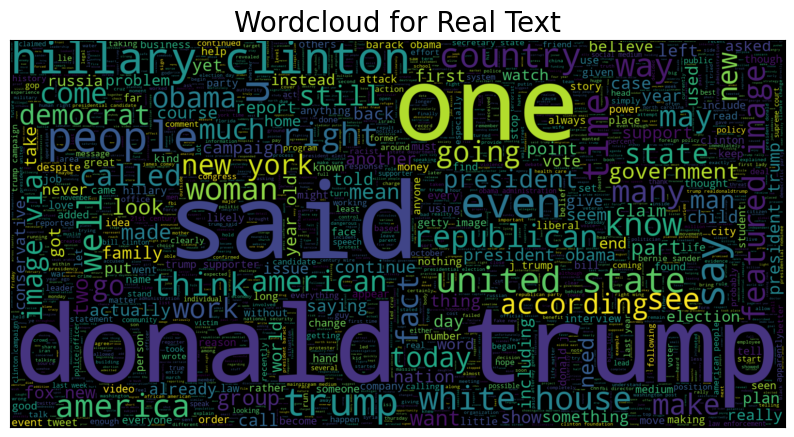

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['text']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Real Text', fontsize = 20);

#### Fake Text

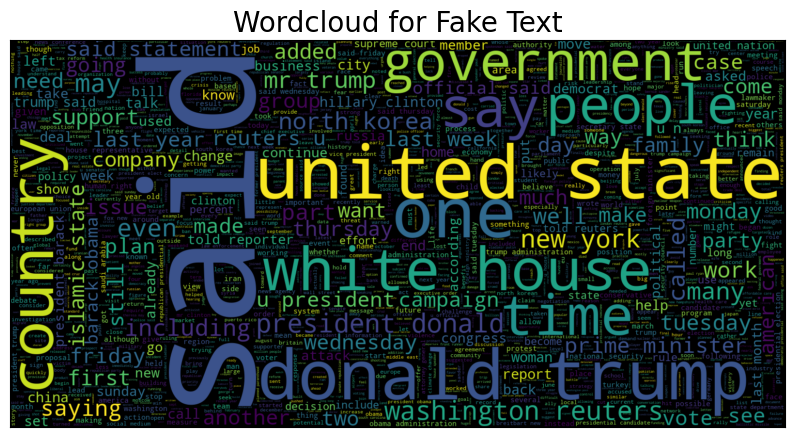

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['text']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Fake Text', fontsize = 20);

#### Real Title

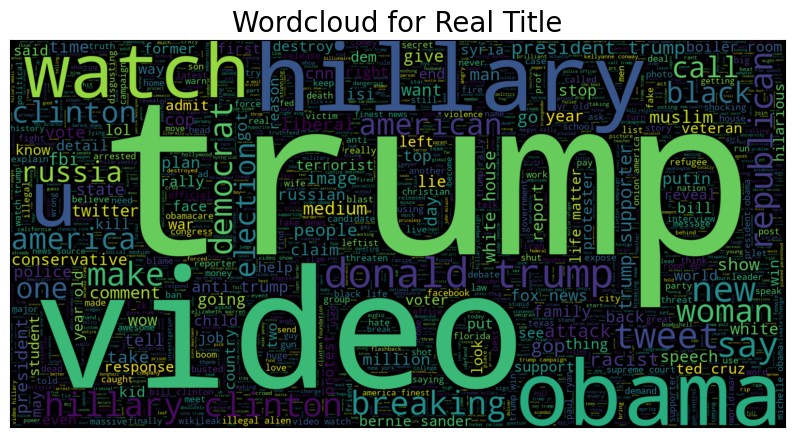

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(real_df['title']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Real Title', fontsize = 20);

#### Fake Title

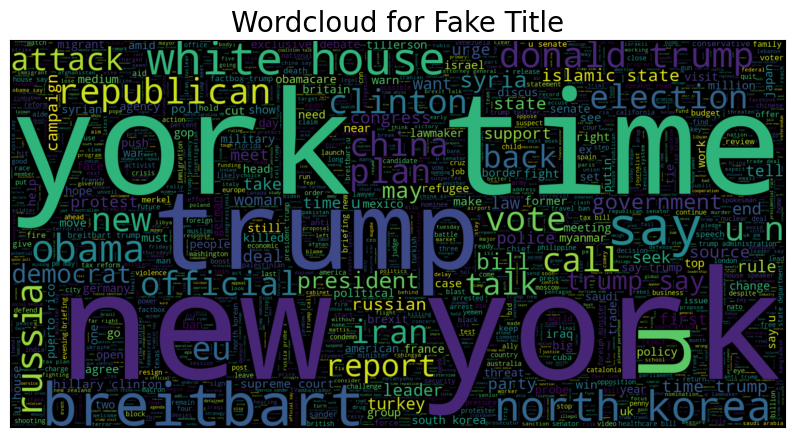

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(fake_df['title']))
plt.imshow(wc, interpolation = 'bilinear')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Wordcloud for Fake Title', fontsize = 20);

### Ngrams Analysis

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Analysis

#### Bigram Analysis

Real Text

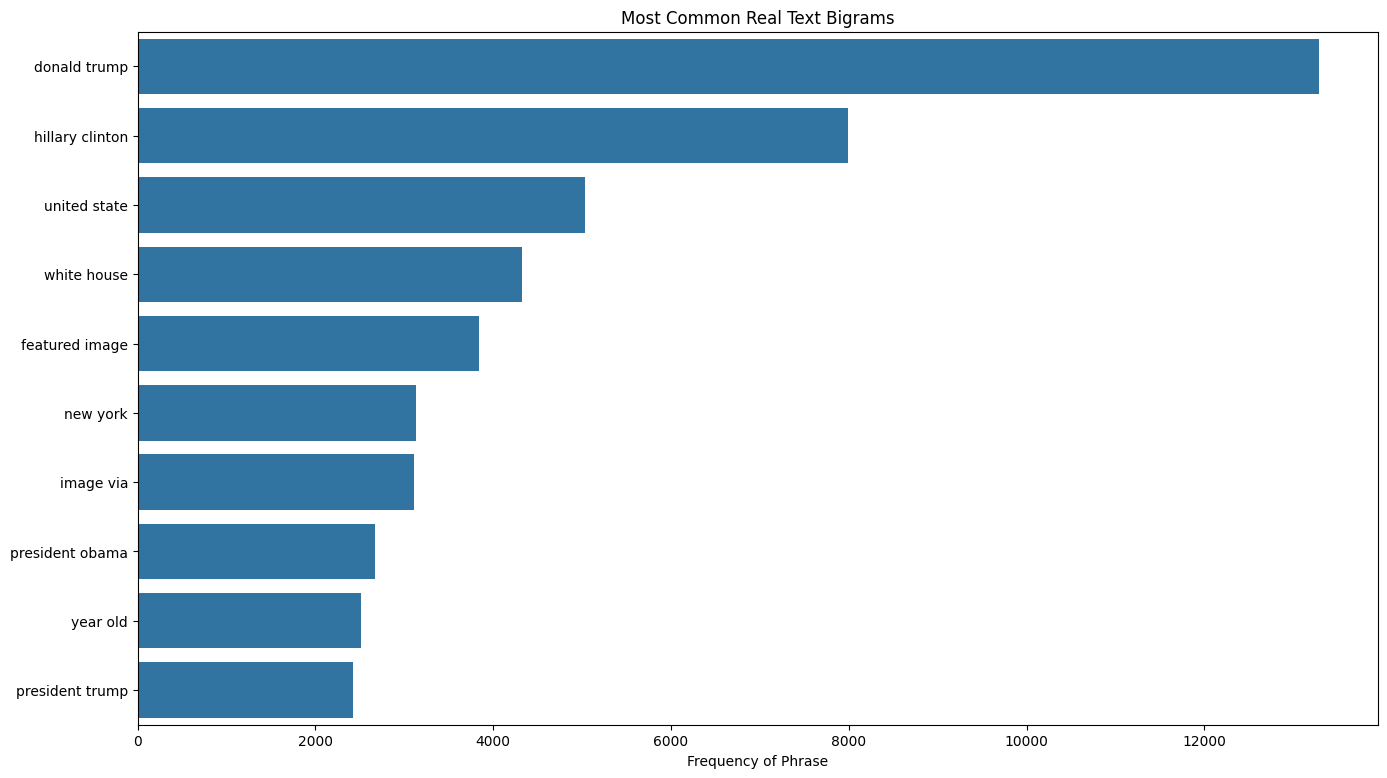

In [74]:
import seaborn as sns
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(real_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Text Bigrams');

Fake Text

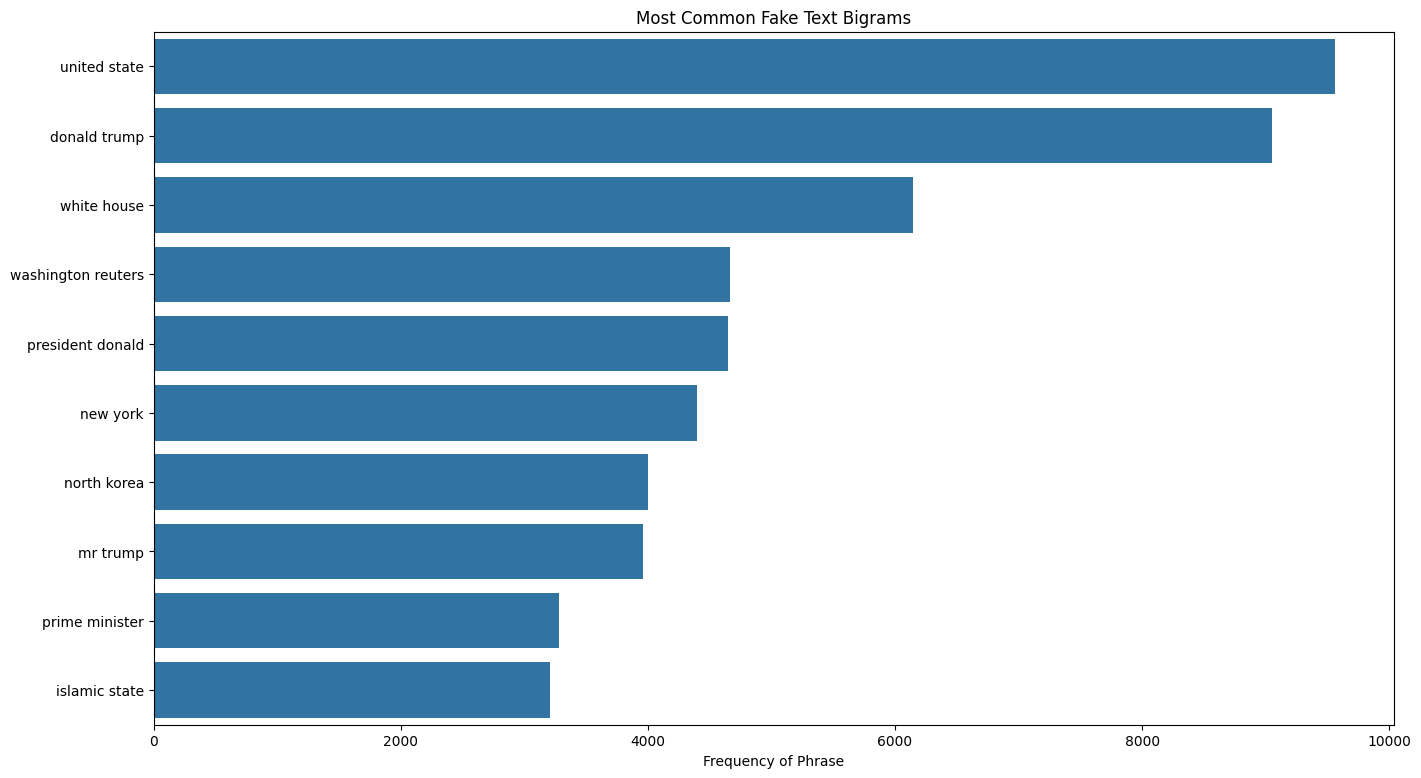

In [75]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(fake_df['text'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Text Bigrams');

Real Title 

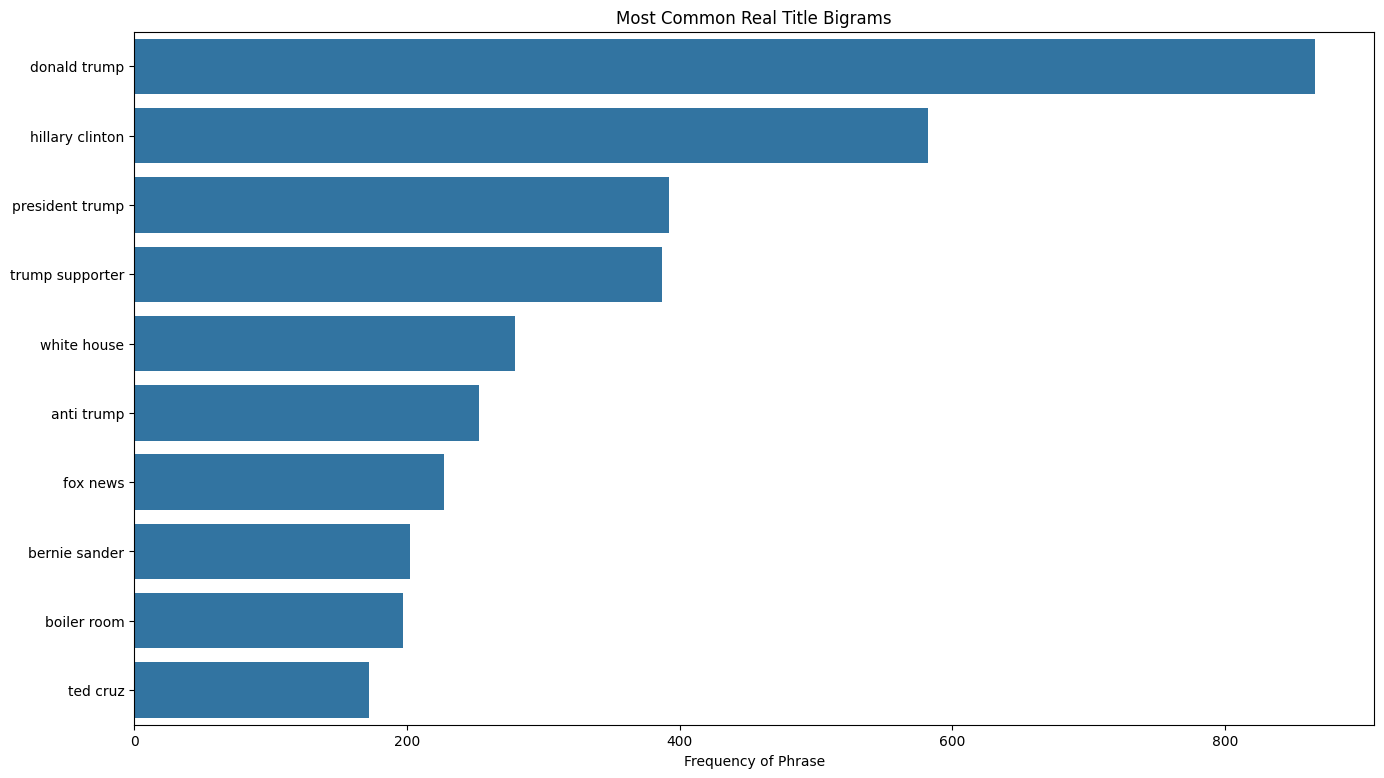

In [76]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(real_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Title Bigrams');

Fake Title

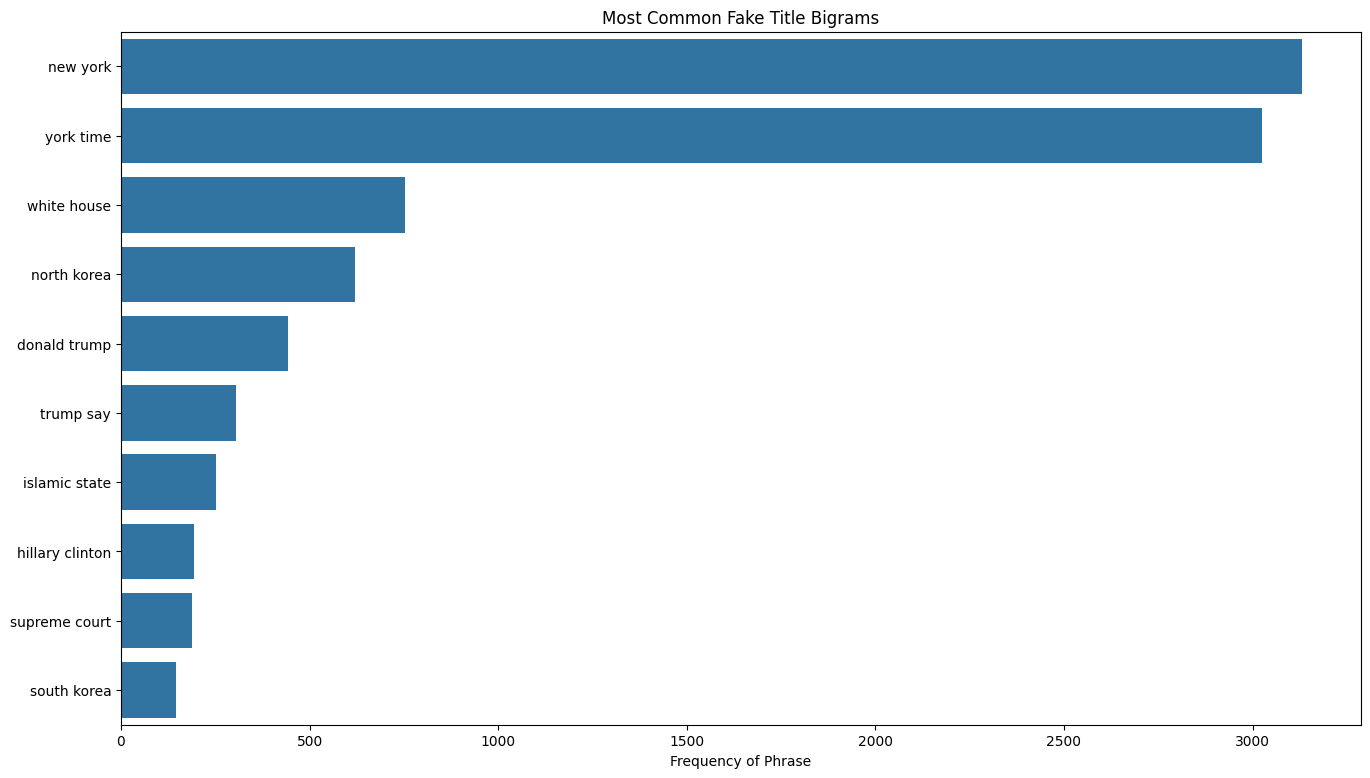

In [77]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(fake_df['title'],10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Title Bigrams');

#### Trigram Analysis

Real

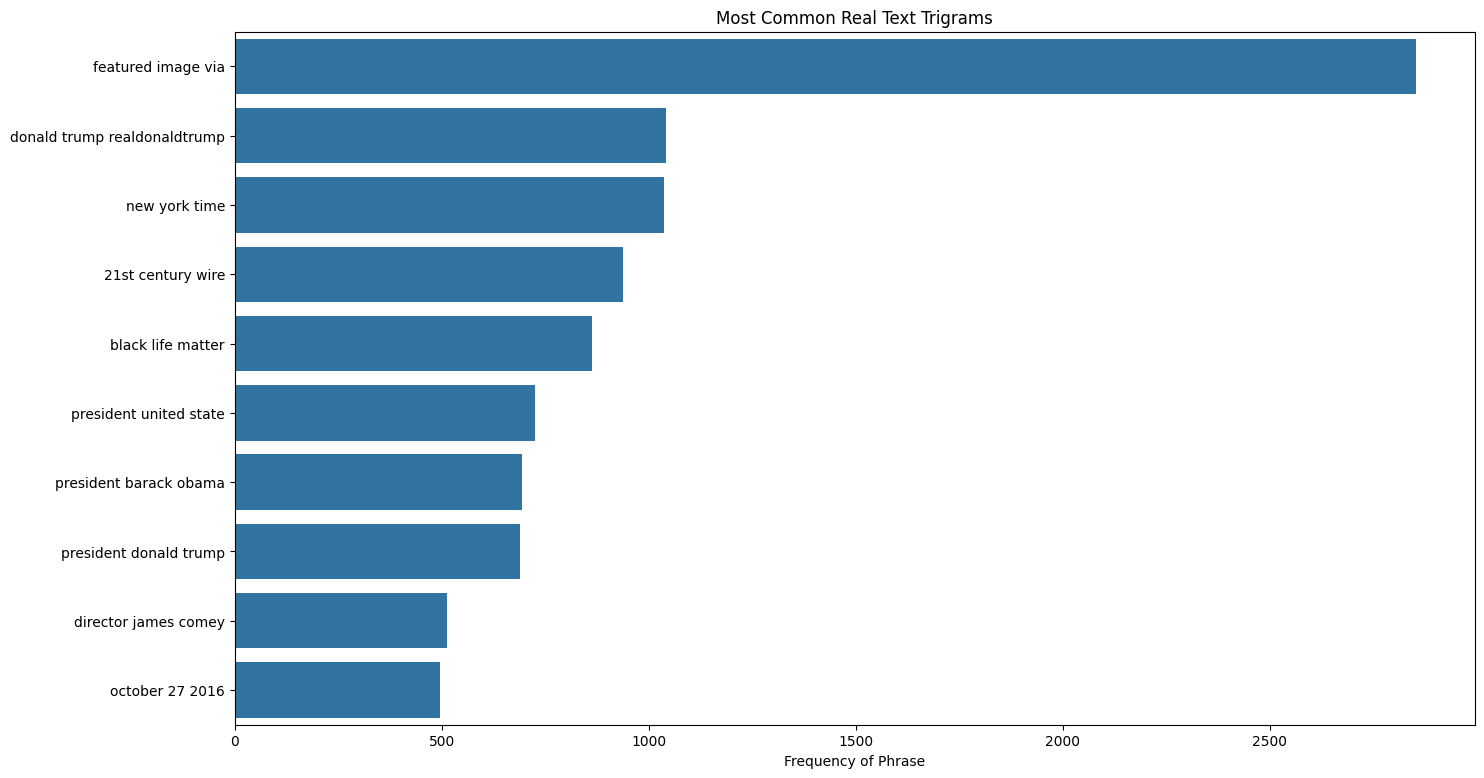

In [78]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(real_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Text Trigrams');

Fake

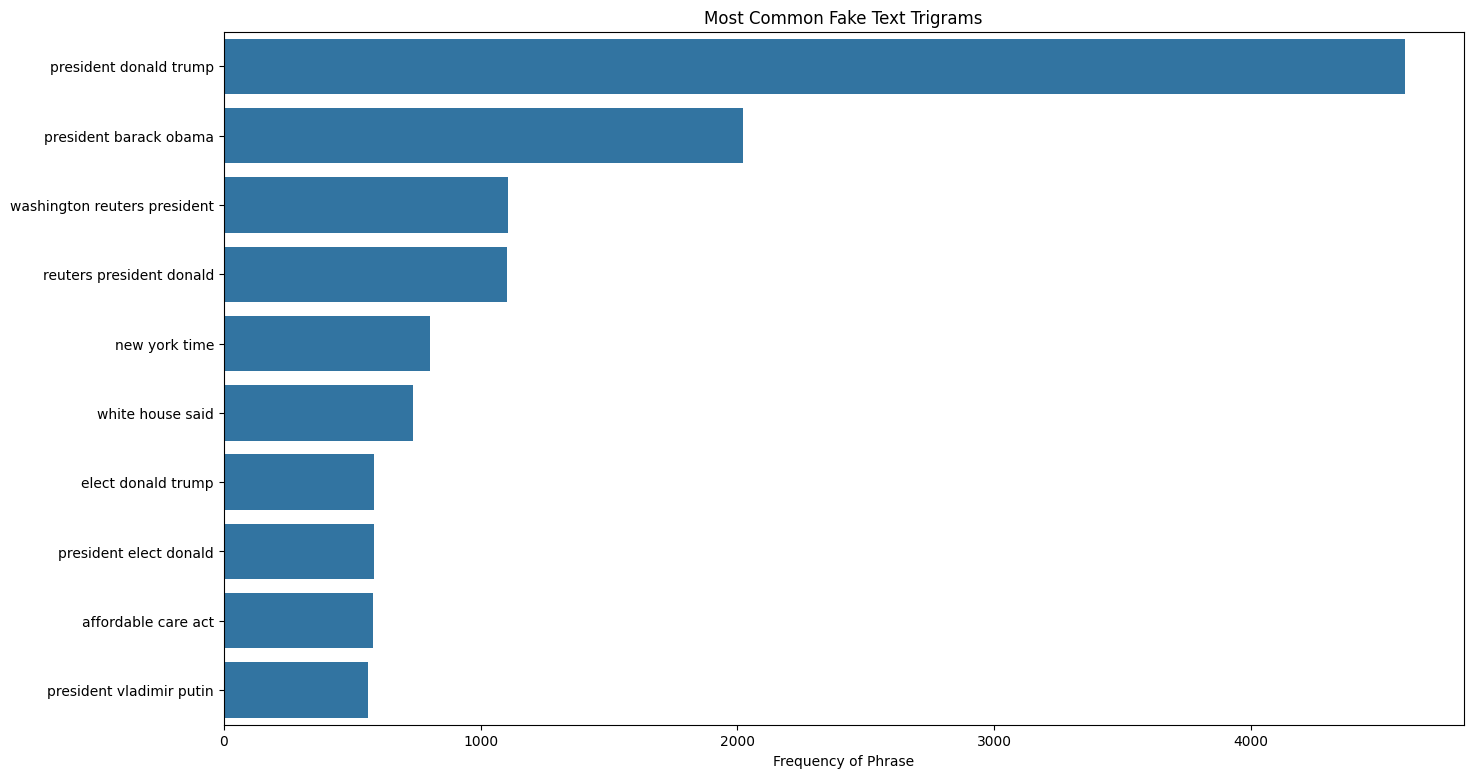

In [79]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(fake_df['text'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Text Trigrams');

Real Title

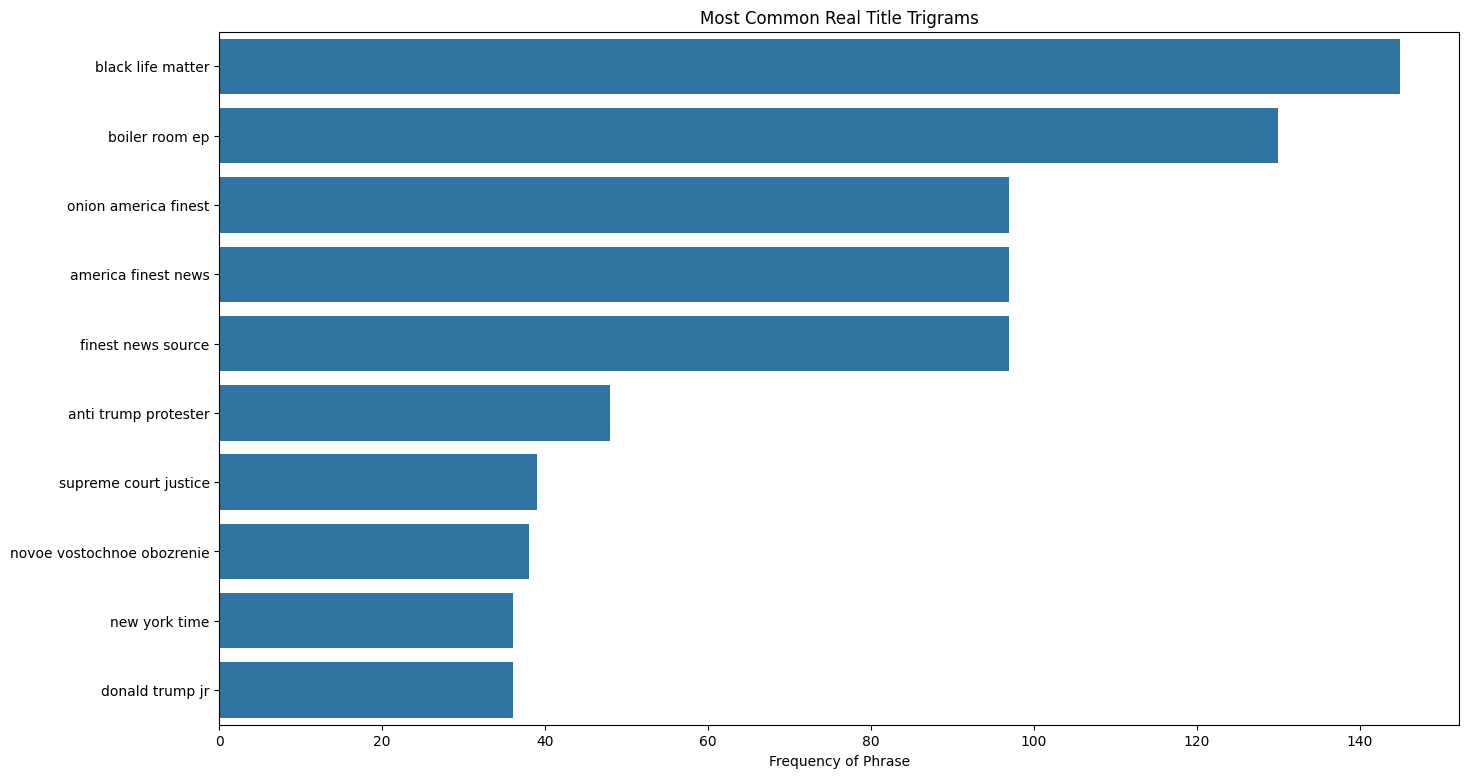

In [80]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(real_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Real Title Trigrams');

Fake Title

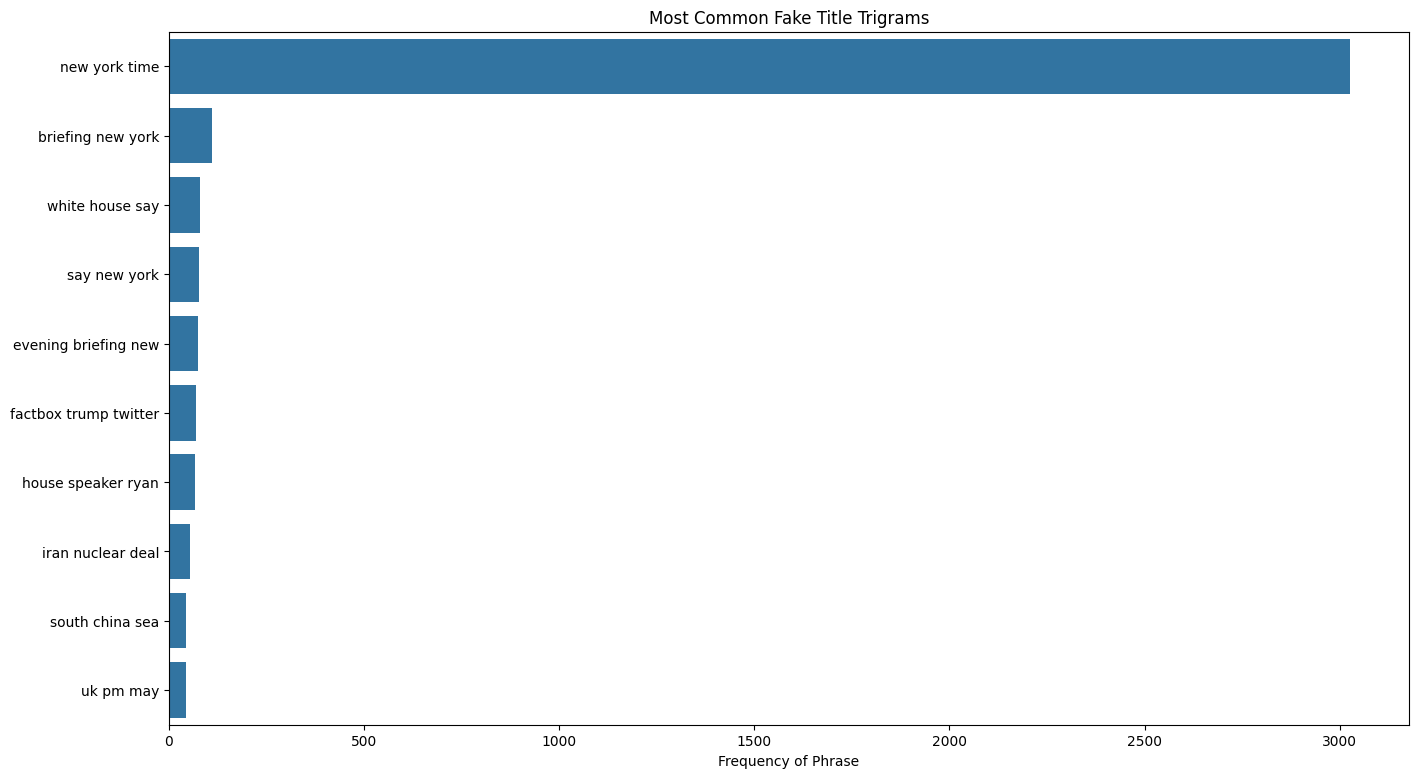

In [81]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(fake_df['title'],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake Title Trigrams');

### Compare F1

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# establish input and output
X = list(new_df['text'])
y = list(new_df['label'])

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for N in range(1, 5):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word', ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.8694
F-1 score of model with n-gram range of (1, 2): 0.9133
F-1 score of model with n-gram range of (1, 3): 0.9223
F-1 score of model with n-gram range of (1, 4): 0.9247


### Topic Modeling

In [84]:
%pip install gensim



Note: you may need to restart the kernel to use updated packages.


In [85]:
%pip install -q --target=/content/gensim_temp gensim

import sys
sys.path.insert(0, '/content/gensim_temp')

import gensim
import pandas as pd

print(gensim.__version__)
print(pd.__version__)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.19.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
4.3.3
2.2.3


In [4]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------- -------------------------- 4.2/12.8 MB 31.5 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.8 MB 17.5 MB/s eta 0:00:01
     ------------------------------ -------- 10.0/12.8 MB 17.2 MB/s eta 0:00:01
     ------------------------------------ -- 12.1/12.8 MB 15.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 13.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import gensim
from gensim import corpora
import spacy

nlp = spacy.load('en_core_web_sm')


In [5]:
import gensim
import pandas as pd

print(gensim.__version__)
print(pd.__version__)


4.3.3
2.2.3


In [6]:
import gensim
from gensim import corpora
import spacy

nlp = spacy.load('en_core_web_sm')


In [42]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel  # Explicit import

def topic_modeling(text):
    item_list = text.tolist()
    items = [text.split() for text in item_list]
    item_dict = corpora.Dictionary(items)
    item_matrix = [item_dict.doc2bow(i) for i in items]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(item_matrix, num_topics=20, id2word=item_dict, passes=10, random_state=0, iterations=50, eval_every=None)
    return ldamodel.show_topics(num_topics=20, formatted=False)

In [43]:
%pip install corpora

Note: you may need to restart the kernel to use updated packages.


In [44]:
real_title_topics = topic_modeling(real_df['title'])
fake_title_topics = topic_modeling(fake_df['title'])
real_text_topics = topic_modeling(real_df['text'])
fake_text_topics = topic_modeling(fake_df['text'])

In [45]:
print(real_title_topics[0],'\n\n',real_title_topics[1])

(0, [('[Video]', 0.029967662), ('TRUMP', 0.0283471), ('ON', 0.026547726), ('[VIDEO]', 0.020256398), ('HILLARY', 0.016710982), ('A', 0.016503792), ('AND', 0.014216121), ('TO', 0.013988243), ('JUST', 0.0129382), ('HILLARY’S', 0.010903599)]) 

 (1, [('Clinton', 0.083558865), ('Hillary', 0.08265378), ('FBI', 0.041537985), ('|', 0.019652199), ('New', 0.014510473), ('Email', 0.014484317), ('Emails', 0.014092062), ('Clinton’s', 0.011729582), ('Investigation', 0.010847598), ('and', 0.009538827)])


### Most/Least Common Words

In [46]:
from collections import Counter
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
def ten_most_common(corpus):
    the_counter = Counter(corpus)
    the_most_common = the_counter.most_common(10)
    new_most_common = dict(the_most_common)
    return new_most_common
def ten_least_common(corpus):
    the_counter = Counter(corpus)
    least_common = the_counter.most_common()[-9:]
    new_least_common = dict(least_common)
    return new_least_common

In [47]:
real_corpus_text = get_corpus(real_df['text'])
real_corpus_title = get_corpus(real_df['title'])
fake_corpus_text = get_corpus(fake_df['text'])
fake_corpus_title = get_corpus(fake_df['title'])

In [48]:
most_common_real_text = ten_most_common(real_corpus_text)
most_common_real_title = ten_most_common(real_corpus_title)
most_common_fake_text = ten_most_common(fake_corpus_text)
most_common_fake_title = ten_most_common(fake_corpus_title)

least_common_real_text = ten_least_common(real_corpus_text)
least_common_real_title = ten_least_common(real_corpus_title)
least_common_fake_text = ten_least_common(fake_corpus_text)
least_common_fake_title = ten_least_common(fake_corpus_title)

### N-grams

In [3]:
def ngrams(the_list, i):
    ngrams_list = []
    for item in the_list:
        ngrams_list.append(TextBlob(item).ngrams(i))
    return ngrams_list

In [61]:
new_df['title_bigrams'] = ngrams([str(x) for x in new_df['title']], 2)
new_df['title_trigrams'] = ngrams([str(x) for x in new_df['title']], 3)

In [ ]:
new_df['text_bigrams'] = ngrams([str(x) for x in new_df['text']], 2)
new_df['text_trigrams'] = ngrams([str(x) for x in new_df['text']], 3)

In [ ]:
new_df[['label', 'title', 'title_bigrams', 'title_trigrams', 'text_bigrams', 'text_trigrams']].head(5)

,label,title,title_bigrams,title_trigrams,text_bigrams,text_trigrams
0,1,law enforcement high alert following threat co...,"[[law, enforcement], [enforcement, high], [hig...","[[law, enforcement, high], [enforcement, high,...","[[comment, expected], [expected, barack], [bar...","[[comment, expected, barack], [expected, barac..."
2,1,unbelievable obama attorney general say charlo...,"[[unbelievable, obama], [obama, attorney], [at...","[[unbelievable, obama, attorney], [obama, atto...","[[demonstrator, gathered], [gathered, last], [...","[[demonstrator, gathered, last], [gathered, la..."
4,1,satan 2 russia unvelis image terrifying new su...,"[[satan, 2], [2, russia], [russia, unvelis], [...","[[satan, 2, russia], [2, russia, unvelis], [ru...","[[r, 28], [28, sarmat], [sarmat, missile], [mi...","[[r, 28, sarmat], [28, sarmat, missile], [sarm..."
5,1,time christian group sue amazon splc designati...,"[[time, christian], [christian, group], [group...","[[time, christian, group], [christian, group, ...","[[say, one], [one, time], [time, someone], [so...","[[say, one, time], [one, time, someone], [time..."
6,1,dr ben carson targeted irs never audit spoke n...,"[[dr, ben], [ben, carson], [carson, targeted],...","[[dr, ben, carson], [ben, carson, targeted], [...","[[dr, ben], [ben, carson], [carson, tell], [te...","[[dr, ben, carson], [ben, carson, tell], [cars..."


In [ ]:
# Removing punctuation and stop words after n-grams
new_df['text']=new_df['text'].apply(remove_stopwords)
new_df['title']=new_df['title'].apply(remove_stopwords)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12760\423215947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text']=new_df['text'].apply(remove_stopwords)
C:\Users\MSI\AppData\Local\Temp\ipykernel_12760\423215947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title']=new_df['title'].apply(remove_stopwords)


### Correlations

In [ ]:
new_df.select_dtypes(include='number').corr()

,label,title_polarity,title_subjectivity,text_polarity,text_subjectivity,word_count_title,char_count_title,avg_word_title,numerics_title,word_count_text,char_count_text,avg_word_text,numerics_text
label,1.000000,-0.054548,0.176189,0.003986,0.211706,0.229436,0.247910,0.041352,0.063045,-0.056190,-0.063698,-0.199460,-0.017795
title_polarity,-0.054548,1.000000,0.016184,0.217895,0.009251,-0.019678,-0.036950,-0.045770,-0.004018,0.008943,0.008108,-0.010233,0.005346
title_subjectivity,0.176189,0.016184,1.000000,0.028575,0.221768,0.213144,0.196100,-0.048433,-0.025459,0.009107,0.003880,-0.089070,-0.007157
text_polarity,0.003986,0.217895,0.028575,1.000000,0.163430,-0.043235,-0.047487,-0.012154,0.000044,-0.015194,-0.018023,-0.049824,-0.004648
text_subjectivity,0.211706,0.009251,0.221768,0.163430,1.000000,0.078451,0.073928,-0.008229,-0.019798,0.043077,0.037514,-0.050633,-0.007898
word_count_title,0.229436,-0.019678,0.213144,-0.043235,0.078451,1.000000,0.926782,-0.171370,0.168307,-0.005929,-0.012115,-0.082689,-0.015609
char_count_title,0.247910,-0.036950,0.196100,-0.047487,0.073928,0.926782,1.000000,0.187642,0.060736,-0.018963,-0.018628,0.009517,-0.035168
avg_word_title,0.041352,-0.045770,-0.048433,-0.012154,-0.008229,-0.171370,0.187642,1.000000,-0.249546,-0.017554,0.000309,0.248031,-0.040869
numerics_title,0.063045,-0.004018,-0.025459,0.000044,-0.019798,0.168307,0.060736,-0.249546,1.000000,0.006643,-0.000251,-0.093282,0.157411
word_count_text,-0.056190,0.008943,0.009107,-0.015194,0.043077,-0.005929,-0.018963,-0.017554,0.006643,1.000000,0.996923,0.047108,0.547569


## 3. **Models**

### Trying Different Models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# dependent and independent variable
x = new_df["text"]
y = new_df["label"]

In [ ]:
# training and testing set from combined dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
models = []
acc = []
f1 = [] # also f1 score for testing data
f1Train = []

### Generate Words Representation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer as cvect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tfvect

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_representation(vectorizer, x_train, x_test, y_train, y_test):
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    return x_train, y_train, x_test, y_test
cv_rep = get_representation(CountVectorizer(), x_train, x_test, y_train, y_test)
tf_rep = get_representation(TfidfVectorizer(), x_train, x_test, y_train, y_test)

In [ ]:
def classify(acc, f1, f1Train, method, cv_rep, tf_rep, tfid = False):
    x_train, y_train, x_test, y_test = tf_rep if tfid else cv_rep
    pipe = make_pipeline(StandardScaler(with_mean=False), method)
    pipe.fit(x_train, y_train)  
    pipe.score(x_test, y_test)  

    y_pred = pipe.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    f1Train.append(f1_score(y_train, pipe.predict(x_train)))
    print(classification_report(y_test, y_pred))

### Decision Tree
https://scikit-learn.org/stable/modules/tree.html#

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print("Decision Tree Classifier with count representation...")
models.append("Decision Tree Classifier with Count Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, False)

Decision Tree Classifier with count representation...
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4597
           1       0.90      0.92      0.91      5081

    accuracy                           0.91      9678
   macro avg       0.91      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



In [ ]:
print("Decision Tree Classifier with TF-IDF representation...")
models.append("Decision Tree Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, DecisionTreeClassifier(), cv_rep, tf_rep, True)

Decision Tree Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4597
           1       0.90      0.92      0.91      5081

    accuracy                           0.90      9678
   macro avg       0.90      0.90      0.90      9678
weighted avg       0.90      0.90      0.90      9678



### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print("Logistic Regression with count representation...")
models.append("Logistic Regression with Count Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, False)

Logistic Regression with count representation...
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      4597
           1       0.92      0.94      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



In [ ]:
print("Logistic Regression with TF-IDF representation...")
models.append("Logistic Regression with TF-IDF Vectorizer")
classify(acc, f1, f1Train, LogisticRegression(max_iter = 1000), cv_rep, tf_rep, True)

Logistic Regression with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4597
           1       0.92      0.93      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



### Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
print("Random Forest Classifier with count representation...")
models.append("Random Forest Classifier with Count Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, False)

Random Forest Classifier with count representation...
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4597
           1       0.91      0.95      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.93      0.92      0.92      9678
weighted avg       0.93      0.92      0.92      9678



In [ ]:
print("Random Forest Classifier with TF-IDF representation...")
models.append("Random Forest Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, RandomForestClassifier(), cv_rep, tf_rep, True)

Random Forest Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4597
           1       0.90      0.95      0.93      5081

    accuracy                           0.92      9678
   macro avg       0.92      0.92      0.92      9678
weighted avg       0.92      0.92      0.92      9678



### Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
print("Gradient Boosting Classifier with count representation...")
models.append("Gradient Boosting Classifier with Count Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, False)

Gradient Boosting Classifier with count representation...
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4597
           1       0.88      0.96      0.92      5081

    accuracy                           0.91      9678
   macro avg       0.92      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



In [ ]:
print("Gradient Boosting Classifier with TF-IDF representation...")
models.append("Gradient Boosting Classifier with TF-IDF Vectorizer")
classify(acc, f1, f1Train, GradientBoostingClassifier(), cv_rep, tf_rep, True)

Gradient Boosting Classifier with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      4597
           1       0.88      0.96      0.92      5081

    accuracy                           0.91      9678
   macro avg       0.92      0.91      0.91      9678
weighted avg       0.91      0.91      0.91      9678



### Support-Vector Machines (SVM) Model

### Support-Vector Machines (SVM) Model NO GRID SEARCH

In [ ]:
from sklearn.svm import SVC

In [ ]:
print("Support-Vector Machines (SVM) with count representation...")
models.append("Support-Vector Machines (SVM) with Count Vectorizer")

vectorizer = CountVectorizer()
x_trainCount = vectorizer.fit_transform(x_train)
x_testCount = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainCount, y_train)

y_pred = SVM.predict(x_testCount)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainCount)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with count representation...
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4597
           1       0.92      0.94      0.93      5081

    accuracy                           0.93      9678
   macro avg       0.93      0.93      0.93      9678
weighted avg       0.93      0.93      0.93      9678



In [ ]:
print("Support-Vector Machines (SVM) with TF-IDF representation...")
models.append("Support-Vector Machines (SVM) with TF-IDF Vectorizer")

vectorizer = TfidfVectorizer()
x_trainTfidf = vectorizer.fit_transform(x_train)
x_testTfidf = vectorizer.transform(x_test)

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_trainTfidf, y_train)

y_pred = SVM.predict(x_testTfidf)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
f1Train.append(f1_score(y_train, SVM.predict(x_trainTfidf)))
print(classification_report(y_test, y_pred))

Support-Vector Machines (SVM) with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4597
           1       0.93      0.96      0.94      5081

    accuracy                           0.94      9678
   macro avg       0.94      0.94      0.94      9678
weighted avg       0.94      0.94      0.94      9678



### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB 

In [ ]:
print("Multinomial Naive Bayes with count representation...")
models.append("Multinomial Naive Bayes with Count Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, False)

Multinomial Naive Bayes with count representation...
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4597
           1       0.90      0.80      0.84      5081

    accuracy                           0.85      9678
   macro avg       0.85      0.85      0.85      9678
weighted avg       0.85      0.85      0.85      9678



In [ ]:
print("Multinomial Naive Bayes with TF-IDF representation...")
models.append("Multinomial Naive Bayes with TF-IDF Vectorizer")
classify(acc, f1, f1Train, MultinomialNB(), cv_rep, tf_rep, True)

Multinomial Naive Bayes with TF-IDF representation...
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4597
           1       0.89      0.80      0.84      5081

    accuracy                           0.84      9678
   macro avg       0.84      0.84      0.84      9678
weighted avg       0.85      0.84      0.84      9678



### Compare Models

In [ ]:
# Compare 2 models
comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

,Model,Accuracy,F1 Score
0,Decision Tree Classifier with Count Vectorizer,0.908246,0.913669
1,Decision Tree Classifier with TF-IDF Vectorizer,0.903699,0.909339
2,Logistic Regression with Count Vectorizer,0.923538,0.928169
3,Logistic Regression with TF-IDF Vectorizer,0.922091,0.926367
4,Random Forest Classifier with Count Vectorizer,0.924468,0.929880
5,Random Forest Classifier with TF-IDF Vectorizer,0.919921,0.925745
6,Gradient Boosting Classifier with Count Vector...,0.909589,0.918048
7,Gradient Boosting Classifier with TF-IDF Vecto...,0.910415,0.918507
8,Multinomial Naive Bayes with Count Vectorizer,0.846559,0.844844
9,Multinomial Naive Bayes with TF-IDF Vectorizer,0.840980,0.840137


In [ ]:
generalization = pd.DataFrame({'Model': models, 'F1 Score of Testing': f1, 'F1 Score of Training': f1Train})
generalization

,Model,F1 Score of Testing,F1 Score of Training
0,Decision Tree Classifier with Count Vectorizer,0.913669,0.999729
1,Decision Tree Classifier with TF-IDF Vectorizer,0.909339,0.999729
2,Logistic Regression with Count Vectorizer,0.928169,0.999556
3,Logistic Regression with TF-IDF Vectorizer,0.926367,0.999729
4,Random Forest Classifier with Count Vectorizer,0.929880,0.999729
5,Random Forest Classifier with TF-IDF Vectorizer,0.925745,0.999729
6,Gradient Boosting Classifier with Count Vector...,0.918048,0.920480
7,Gradient Boosting Classifier with TF-IDF Vecto...,0.918507,0.922025
8,Multinomial Naive Bayes with Count Vectorizer,0.844844,0.953740
9,Multinomial Naive Bayes with TF-IDF Vectorizer,0.840137,0.965313


In [ ]:
f1

[0.9136690647482014,
 0.9093385214007782,
 0.928169287516987,
 0.9263671875,
 0.9298800959232614,
 0.9257449458656702,
 0.9180481408635385,
 0.9185073785130181,
 0.8448437989760735,
 0.840137114365846]